In [2]:
import numpy as np
import math, cv2, os
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.compat.v1 import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout


Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
#cpu - gpu configuration
config = tf.compat.v1.ConfigProto( device_count = {'GPU': 0 , 'CPU': 56} ) 
# sess = tf.Session(config=config) 
sess = tf.compat.v1.Session(config=config)
keras.backend.set_session(sess)


In [4]:
train_dataset_path="TRAIN\"  
test_dataset_path="TEST\"    
in_dir=r'give your path here' 
CATEGORIES    = ['EOSINOPHIL','LYMPHOCYTE','MONOCYTE','NEUTROPHIL'] 

SyntaxError: EOL while scanning string literal (<ipython-input-4-6617a05607ac>, line 1)

NameError: name 'in_dir' is not defined

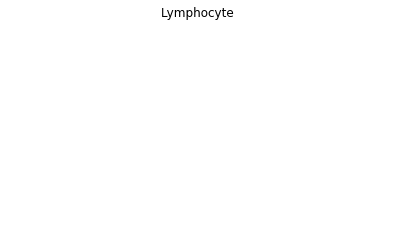

In [5]:
def plotImage(image_path):
    image = cv2.imread(image_path)
    image = image[:,:,[2,1,0]]
    image = image.astype('float32')/255
    plt.imshow(image)
    return

plt.figure(figsize=(15,8))
plt.subplot(221)
plt.title('Lymphocyte'); plt.axis('off'); plotImage(os.path.join(in_dir, 'TRAIN/LYMPHOCYTE/_0_204.jpeg'))

In [38]:
print('Training samples:')
train_dir = os.path.join(in_dir, "TRAIN")  
num_samples = 0  
for cell in os.listdir(train_dir):
    num_cells = len(os.listdir(os.path.join(train_dir, cell))) 
    num_samples += num_cells
    print('Cell: {:15s}  num samples: {:d}'.format(cell, num_cells))
print('Total training samples: {:d}\n'.format(num_samples)) 

#for testing data
print("testing samples")
num_samples=0
test_dir = os.path.join(in_dir, "TEST")
for cell in os.listdir(test_dir):
  num_cells=len(os.listdir(os.path.join(test_dir,cell)))
  num_samples+=num_cells
  print("cell:{:15s} num samples : {:d}".format(cell,num_cells))
print("total testing sample: {:d}\n".format(num_samples))  

Training samples:
Cell: EOSINOPHIL       num samples: 2497
Cell: LYMPHOCYTE       num samples: 2483
Cell: MONOCYTE         num samples: 2478
Cell: NEUTROPHIL       num samples: 2499
Total training samples: 9957

testing samples
cell:EOSINOPHIL      num samples : 623
cell:LYMPHOCYTE      num samples : 620
cell:MONOCYTE        num samples : 620
cell:NEUTROPHIL      num samples : 624
total testing sample: 2487



In [12]:

train_datagen = ImageDataGenerator(rescale = 1./255) 

#if we have less features data and we want to create more dataset for training purpose
#so karas gives a method that we can do rescale,shaear_range,zoom_range,and horizontal and more.....



In [13]:
test_datagen = ImageDataGenerator(rescale = 1./255)


In [21]:



training_set = train_datagen.flow_from_directory(os.path.join(in_dir, "TRAIN"),  
                                                 target_size = (64, 64), 
                                                 batch_size = 32, 
                                                 color_mode='rgb', 
                                                 shuffle=True, 
                                                 seed=None, 
                                                 class_mode = 'categorical') 


Found 9957 images belonging to 4 classes.


In [22]:
test_set = train_datagen.flow_from_directory(os.path.join(in_dir, "TEST"),  
                                                 target_size = (64, 64), 
                                                 batch_size = 32, 
                                                 color_mode='rgb', 
                                                 shuffle=True, 
                                                 seed=None, 
                                                 class_mode = 'categorical') 

Found 2487 images belonging to 4 classes.


In [23]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution

classifier.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape = (64, 64, 3), activation = 'relu'))


# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.20))

classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.20)) 

# Adding Third convolutional layer
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.20)) #randomly droping out 20% of the weights of this layer 

# Step 3 - Flattening
classifier.add(Flatten())


# Step 4 - Full connection
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dense(units = 4, activation = 'softmax'))



In [24]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [25]:
history=classifier.fit_generator(training_set,
                         steps_per_epoch = 100,
                         epochs = 20,
                         validation_data = test_set,
                         validation_steps =100)

Epoch 1/20
100/100 [==============================] - 148s 1s/step - loss: 1.3899 - accuracy: 0.2506 - val_loss: 1.3846 - val_accuracy: 0.2548
Epoch 2/20
100/100 [==============================] - 91s 909ms/step - loss: 1.3865 - accuracy: 0.2362 - val_loss: 1.3851 - val_accuracy: 0.2507
Epoch 3/20
100/100 [==============================] - 93s 935ms/step - loss: 1.3866 - accuracy: 0.2506 - val_loss: 1.3900 - val_accuracy: 0.2523
Epoch 4/20
100/100 [==============================] - 33s 326ms/step - loss: 1.3865 - accuracy: 0.2419 - val_loss: 1.3880 - val_accuracy: 0.2495
Epoch 5/20
100/100 [==============================] - 32s 317ms/step - loss: 1.3869 - accuracy: 0.2436 - val_loss: 1.3863 - val_accuracy: 0.2567
Epoch 6/20
100/100 [==============================] - 32s 319ms/step - loss: 1.3869 - accuracy: 0.2353 - val_loss: 1.3837 - val_accuracy: 0.2849
Epoch 7/20
100/100 [==============================] - 33s 325ms/step - loss: 1.3864 - accuracy: 0.2478 - val_loss: 1.3865 - val_accu

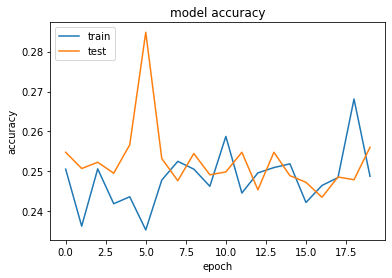

In [26]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left')
                                                 
plt.show() # to show the plot

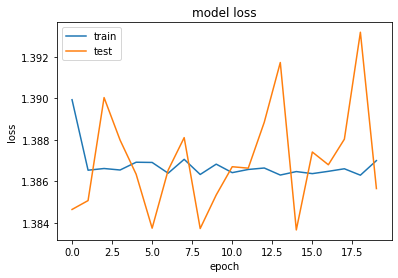

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left') 
                                                 
plt.show() # to show the plot

In [28]:

#this code makes pickle file
import pickle
filename = 'Blood_cell.pkl'
model_pkl = open(filename, 'wb') 
pickle.dump(classifier, model_pkl)
# Close the pickle instances
model_pkl.close()   

In [29]:

import pickle
digit_detect_pkl=open('Blood_cell.pkl','rb') #opening our pickle file of model in "rb" i.e. "rb" mode opens the file in binary format for reading.
model = pickle.load(digit_detect_pkl) #loading our pickle object using .load method of pickle."""

In [30]:
y_pred = model.predict_generator(test_set) 
y_pred=y_pred.argmax(axis=-1) 

In [31]:
y_true = test_set.classes 

In [32]:
y_true

array([0, 0, 0, ..., 3, 3, 3])

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score #importing confusion_matrix and accuracy_score from sklearn.metrics


In [34]:
cm=confusion_matrix(y_true,y_pred) #confusion matrix takes 2 arguments i.e. actual and predicted values
print(cm)

[[623   0   0   0]
 [620   0   0   0]
 [620   0   0   0]
 [624   0   0   0]]


In [35]:
print(accuracy_score(y_true,y_pred)) #accuracy

0.2505026135906715
